In [13]:
# D Larue, 10/24/24
# Fraction of graduation given number of math courses and "GPA" in them

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

# read in cleaned data
grades = pd.read_csv('newdata.csv')

C:\Users\david\AppData\Local\Temp\ipykernel_61220\2904078016.py:37: RuntimeWarning: invalid value encountered in divide
  ncr_gpa_pct=ncr_gpa_num/ncr_gpa_den


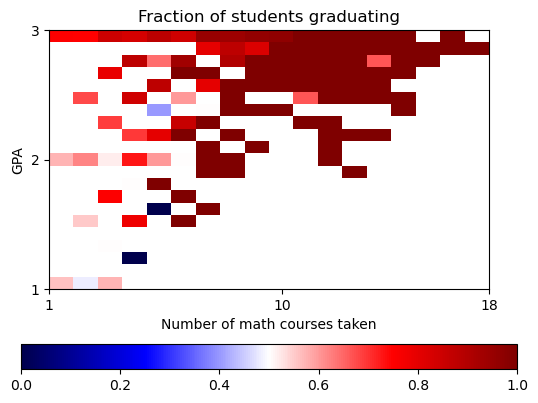

In [19]:
# count courses taken by each student
how_many = np.count_nonzero(grades.iloc[:,5:],axis=1)
# total the (1,2,3) grades for each student
sum_grades = grades.iloc[:,5:].sum(axis=1)
# compute a "grade point average"
gpa=sum_grades/how_many
# list of graduation statuses
grad=grades.iloc[:,3:4]
# number of students
num_rows = len(grades)
# initialize array that counts the number of graduates for given count of courses, gpa
#count_grads = np.zeros((len(how_many),len(gpa)))
count_grads = np.zeros((num_rows,num_rows))
num_grad_numcrs_gpa=np.zeros((num_rows,num_rows))
num_stud_numcrs_gpa=np.zeros((num_rows,num_rows))

#rounding gpa to nearest tenth
#gpa in 1..3 grade point average, so 1.0, 1.1, ..., 2.9, 3.0, so 21 in length
#ncr in 1..18 number of courses, 18 length
# magic numbers
digits_gpa=1
num_gpa = 21
num_ncr = 18
# numerator, denominator, fraction
ncr_gpa_num=np.zeros((num_gpa,num_ncr))
ncr_gpa_den=np.zeros((num_gpa,num_ncr))
ncr_gpa_pct=np.zeros((num_gpa,num_ncr))
for stu in range(num_rows):
    stu_num_courses=how_many[stu]
    # round gpa, data then is about a range of gpa
    stu_gpa=round(gpa[stu],digits_gpa)
    # index arithmetic for rounded gpa
    stu_num_idx=stu_num_courses-1
    stu_gpa_idx=round((stu_gpa-1)*10)
    stu_grad=grad.iloc[stu,0]
    # count student, and only those who graduate
    ncr_gpa_den[stu_gpa_idx,stu_num_idx]+=1
    if (stu_grad==1):
        ncr_gpa_num[stu_gpa_idx,stu_num_idx]+=1
# compute fraction that graduated
ncr_gpa_pct=ncr_gpa_num/ncr_gpa_den
# zero out the nan's
np.nan_to_num(ncr_gpa_pct,nan=0)

# plot the fraction of student graduating as a function of number of courses and GPA
ax = plt.gca()
im = plt.imshow(ncr_gpa_pct, cmap='seismic',origin='lower',aspect=0.5,extent=[1,18,10,30])
plt.colorbar(im, orientation='horizontal')
plt.xlabel('Number of math courses taken')
plt.ylabel('GPA')
ax.set_xticks([1,10,18])
plt.yticks([10,20,30],[1,2,3])
plt.title('Fraction of students graduating')
plt.show()

Graph of the fraction of students graduating given the number of math courses they have taken and their "gpa".
Observations: 
1. More than about 5 math courses gives high (>90%) fraction of graduation; 
2. Fewer gives about 60% graduate. 
3. No students take many math courses and get a low GPA.